In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

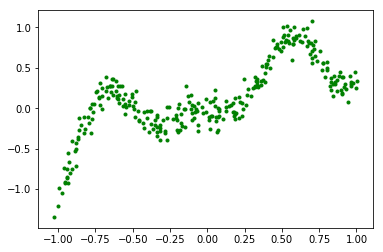

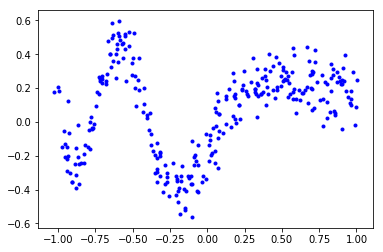

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y0= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y0 = y0 + noise

y1 = 0.4*(-x+np.cos(15*(x-0.85)**2))+0.15
noise = np.random.normal(0,0.1, x.shape)
y1 = y1 + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy0 = y0.reshape(-1,1)
yy1 = y1.reshape(-1,1)

yy = np.c_[y0,y1]
%matplotlib inline
plt.scatter(x, y0, marker='.', color='g')
plt.show()
plt.scatter(x, y1, marker='.', color='b')
plt.show()

In [3]:
yy.shape

(300, 2)

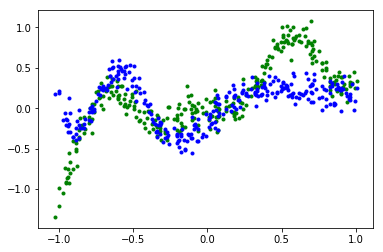

In [4]:
## plotting together
%matplotlib inline
plt.scatter(x, y0, marker='.', color='g')
plt.scatter(x, y1, marker='.', color='b')
plt.show()

## Building model for both at once

In [5]:
n_hidden = 4
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(1, n_hidden, activation=tnn.LeakyRelu(), optimizer=optimizer)
layer2 = tnn.LinearLayer(n_hidden, 2, optimizer=optimizer)

_______________________
epoch 0
Loss 1.1256176087327028

_______________________
epoch 100
Loss 0.050156881144161725

_______________________
epoch 200
Loss 0.03807573784968679

_______________________
epoch 300
Loss 0.03669142268367758

_______________________
epoch 400
Loss 0.03544246391708257

_______________________
epoch 500
Loss 0.03398952033197422

_______________________
epoch 600
Loss 0.03241073205223171

_______________________
epoch 700
Loss 0.030840716876260443

_______________________
epoch 800
Loss 0.029874495967018196

_______________________
epoch 900
Loss 0.029302963052233236

_______________________
epoch 1000
Loss 0.028989557948472962

_______________________
epoch 1100
Loss 0.0287689539538194

_______________________
epoch 1200
Loss 0.028601509011093852

_______________________
epoch 1300
Loss 0.028448679372667318

_______________________
epoch 1400
Loss 0.02830774939991668

_______________________
epoch 1500
Loss 0.028183343006150868

_______________________
epoch 


_______________________
epoch 13300
Loss 0.027188360481463995

_______________________
epoch 13400
Loss 0.02718696474890938

_______________________
epoch 13500
Loss 0.02718696307128507

_______________________
epoch 13600
Loss 0.027186962526616253

_______________________
epoch 13700
Loss 0.027186971284427226

_______________________
epoch 13800
Loss 0.027186963345769807

_______________________
epoch 13900
Loss 0.027186962573609783

_______________________
epoch 14000
Loss 0.027186962096721546

_______________________
epoch 14100
Loss 0.02718699809104107

_______________________
epoch 14200
Loss 0.027186962374977468

_______________________
epoch 14300
Loss 0.027186961608681535

_______________________
epoch 14400
Loss 0.027186961107433547

_______________________
epoch 14500
Loss 0.027186963229241728

_______________________
epoch 14600
Loss 0.02718696202250219

_______________________
epoch 14700
Loss 0.027186961217681056

_______________________
epoch 14800
Loss 0.027186960691846

TclError: invalid command name "pyimage12"

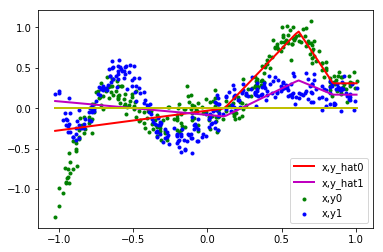

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    
    y_out = net.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y0, marker='.', color='g', label='x,y0')
        plt.scatter(x, y1, marker='.', color='b', label='x,y1')
        
        plt.plot(x, y_out[:,0], c='r', lw=2, label='x,y_hat0')
        plt.plot(x, y_out[:,1], c='m', lw=2, label='x,y_hat1')
        
#         plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='y', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

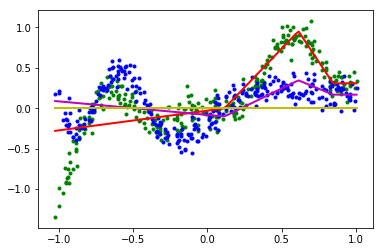

In [7]:
%matplotlib inline
plt.scatter(x, y0, marker='.', color='g', label='x,y0')
plt.scatter(x, y1, marker='.', color='b', label='x,y1')

plt.plot(x, y_out[:,0], c='r', lw=2, label='x,y_hat0')
plt.plot(x, y_out[:,1], c='m', lw=2, label='x,y_hat1')

#         plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

In [8]:
print('the combined error is', loss)
loss_a = tnn.MseLoss.loss(y_out[:, :1], yy[:, :1])
loss_b = tnn.MseLoss.loss(y_out[:, 1:], yy[:, 1:])
print('the error "a" is', loss_a)
print('the error "b" is', loss_b)

the combined error is 0.02718695520119824
the error "a" is 0.027788098818598027
the error "b" is 0.026585811583798462


### Splitting, Optimizing, Individually

In [9]:
### The fit for both the functions,, the fits are not best,,, we can better fit the data
### if we use seperate functions for each, rather than sharing hidden units...

### Lets copy the first layer and split the second layer into two,, forming 2 networks for
### each output

In [10]:
import copy

In [11]:
l1_a = copy.deepcopy(layer1)
l1_b = copy.deepcopy(layer1)

In [12]:
layer2.weights, layer2.bias

(array([[-2.05576254, -0.72668802],
        [ 0.42706763,  0.27135445],
        [ 2.16529336,  0.59323006],
        [-0.05886743,  0.36653726]]), array([0.30864971, 0.17136321]))

In [13]:
layer2.weights[:,:1], layer2.bias[:1]

(array([[-2.05576254],
        [ 0.42706763],
        [ 2.16529336],
        [-0.05886743]]), array([0.30864971]))

In [14]:
l2_a = tnn.LinearLayer(4,1,
                       weights=copy.deepcopy(layer2.weights[:,:1]),
                       bias=copy.deepcopy(layer2.bias[:1]),
                       optimizer=optimizer)
l2_b = tnn.LinearLayer(4,1,
                       weights=copy.deepcopy(layer2.weights[:,1:]),
                       bias=copy.deepcopy(layer2.bias[1:]),
                       optimizer=optimizer)

In [15]:
net_a = tnn.AutoForm()
net_b = tnn.AutoForm()

In [16]:
net_a.layerList = [l1_a, l2_a]
net_b.layerList = [l1_b, l2_b]

_______________________
epoch 0
Loss a=0.027788088863100142 b=0.02658582117499359

_______________________
epoch 100
Loss a=0.026760643734883446 b=0.02346307058476201

_______________________
epoch 200
Loss a=0.026714325010738282 b=0.02332211924813665

_______________________
epoch 300
Loss a=0.026703387616442226 b=0.023312929972449038

_______________________
epoch 400
Loss a=0.026697012407727212 b=0.023307189972206394

_______________________
epoch 500
Loss a=0.026693098099995084 b=0.02330244363650747

_______________________
epoch 600
Loss a=0.02669045838985626 b=0.023298253253659952

_______________________
epoch 700
Loss a=0.026688821088252736 b=0.02329485115580885

_______________________
epoch 800
Loss a=0.026684561912364468 b=0.02329219647711944

_______________________
epoch 900
Loss a=0.02668366212858428 b=0.023291187956056208

_______________________
epoch 1000
Loss a=0.02668209638792855 b=0.0232906542015

_______________________
epoch 1100
Loss a=0.02668164845036338 b=0.023


_______________________
epoch 9600
Loss a=0.026681306359801312 b=0.023291376630456807

_______________________
epoch 9700
Loss a=0.026681284768684713 b=0.023306900262539173

_______________________
epoch 9800
Loss a=0.026681731967838705 b=0.023287356838896812

_______________________
epoch 9900
Loss a=0.02668141355219846 b=0.02328745601931865

_______________________
epoch 10000
Loss a=0.026681800855426877 b=0.023287159100710653

_______________________
epoch 10100
Loss a=0.02668135466104267 b=0.023287056025559503

_______________________
epoch 10200
Loss a=0.026681528702213946 b=0.02328690436896029

_______________________
epoch 10300
Loss a=0.026681361376320697 b=0.02328734758534238

_______________________
epoch 10400
Loss a=0.026681752895887433 b=0.023286651267918405

_______________________
epoch 10500
Loss a=0.026681306797226155 b=0.02328651391649963

_______________________
epoch 10600
Loss a=0.0266818591584385 b=0.02329243938541772

_______________________
epoch 10700
Loss a=0

TclError: invalid command name "pyimage37"

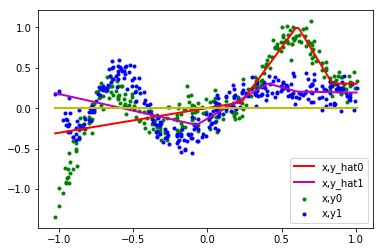

In [17]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    
    y_out0 = net_a.forward(xx)
    loss0 = tnn.MseLoss.loss(y_out0, yy0)
    
    dy0 = tnn.MseLoss.del_loss(y_out0, yy0)
    dx0 = net_a.backward(dy0)
    
    net_a.update()
    
    
    y_out1 = net_b.forward(xx)
    loss1 = tnn.MseLoss.loss(y_out1, yy1)
    
    dy1 = tnn.MseLoss.del_loss(y_out1, yy1)
    dx1 = net_b.backward(dy1)
    
    net_b.update()
    
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print(f"Loss a={loss0} b={loss1}")

        ax.clear()
        plt.scatter(x, y0, marker='.', color='g', label='x,y0')
        plt.scatter(x, y1, marker='.', color='b', label='x,y1')
        
        plt.plot(x, y_out0, c='r', lw=2, label='x,y_hat0')
        plt.plot(x, y_out1, c='m', lw=2, label='x,y_hat1')
        
#         plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='y', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

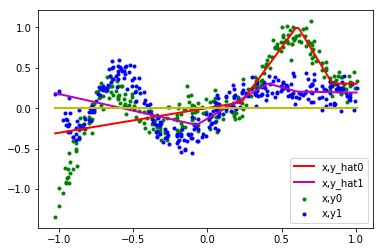

In [18]:
%matplotlib inline
plt.scatter(x, y0, marker='.', color='g', label='x,y0')
plt.scatter(x, y1, marker='.', color='b', label='x,y1')

plt.plot(x, y_out0, c='r', lw=2, label='x,y_hat0')
plt.plot(x, y_out1, c='m', lw=2, label='x,y_hat1')

plt.plot(x, np.zeros_like(x), c='y', lw=2)
plt.legend()

In [19]:
print('the error "a" is', loss0)
print('the error "b" is', loss1)

the error "a" is 0.026696289695709082
the error "b" is 0.023283261964855858
